In [1]:
%load_ext autoreload
%autoreload 2
import json
import uproot
from XRootD import client
import xgboost as xgb
import os
import sys
sys.path.append("../../analysisTools/")
from skimmerTools import Skimmer
import coffea
import coffea.util as util
import numpy as np
import awkward as ak
import time
import h5py
import BDTutils_v2 as bdt

# Skims

In [2]:
suffix = "_TrueVertexForSignal_NJetL3_ISRonly"
cut_config = "./cut_configs/BDT_preselections_NJetL3_ISRonly.py"
signal_json = "../../configs/sample_configs/skimmed_signal/skimmed_signal_2018_v11_miniAOD_aEM_rdfSkim_MET200_nJetsG0.json"
bkg_json = "../../configs/sample_configs/skimmed_bkg/skimmed_bkg_2018_v9_miniAOD_rdfSkim_MET200_nJetsG0.json"

In [3]:
# skim signal
samp = signal_json.split("/")[-1].split(".")[0]
print(f'Start analyzing: {samp}')    
skim = Skimmer(signal_json, cut_config)
t1 = time.time()
out = skim.process(execr='futures',workers=80)
t2 = time.time()
bdt.write_h5(out[0],f"h5/{samp}{suffix}.h5")

print('Completed in {:.2f} min\n'.format((t2-t1)/60))
del out, skim

Start analyzing: skimmed_signal_2018_v11_miniAOD_aEM_rdfSkim_MET200_nJetsG0


Output()

Output()

Completed in 0.53 min



In [4]:
# skim bkg
samp = bkg_json.split("/")[-1].split(".")[0]
print(f'Start analyzing: {samp}')    
skim = Skimmer(bkg_json, cut_config)
t1 = time.time()
out = skim.process(execr='futures',workers=80)
t2 = time.time()
bdt.write_h5(out[0],f"h5/{samp}{suffix}.h5")

print('Completed in {:.2f} min\n'.format((t2-t1)/60))
del out, skim

Start analyzing: skimmed_bkg_2018_v9_miniAOD_rdfSkim_MET200_nJetsG0


Output()

Output()

Completed in 1.27 min



# BDT version 1

Here we are using events with 0 < nJets < 3, no b-tagged + the standard skimming preselection. We also use:
- The v8 good_vtx def, which does not include any mass cuts
- ISR cuts
- jetMETdPhi > 2 and dPhi(jets,MET) > 0.75
- Refit M(ee) > 0.1 GeV
- |PFMET - CaloMET|/CaloMET < 0.7

In [2]:
sig_file = "skimmed_signal_2018_v11_miniAOD_aEM_rdfSkim_MET200_nJetsG0_TrueVertexForSignal_NJetL3"
bkg_file = "skimmed_bkg_2018_v9_miniAOD_rdfSkim_MET200_nJetsG0_TrueVertexForSignal_NJetL3"
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_refit_m','sel_vtx_refit_dR','sel_vtx_corrMinDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'sel_vtx_prod_eta', 'met_leadPt_ratio', 'jetMETdPhi', 'minJetMETdPhi']
bdt_name = "BDT_NJetL3"

Signal events 186468 -> 186468 after gen matching (raw counts)

m1_60.0_delta_0.2_ctau_1 has zero counts
m1_80.0_delta_0.2_ctau_1 has zero counts
m1_60.0_delta_0.2_ctau_10 has zero counts
m1_60.0_delta_0.2_ctau_100 has zero counts
Number of signal subprocesses (training set) with non-zero count: 62
Raw bkg counts: 6102
Number of total background events (raw counts): 6102
Total background counts (xsec weighted): 1583.24
Total background counts (raw): 6102
Sum bkg sf  6102.0
Signal sample size (all subprocesses summed): 372936
Background sample size (all subprocesses summed): 6102
0.016362056760409294 more background than signal samples
There are 62 subprocesses in signal, i.e. per m1/delta/ctau points.

Ideally, sig and bkg sample size for BDT input should be the same.

For background, we care about each background process contribution to the total, i.e. QCD having higher xsec than Diboson.
This should be taken into account, so we got the SF for background input that will correct for th

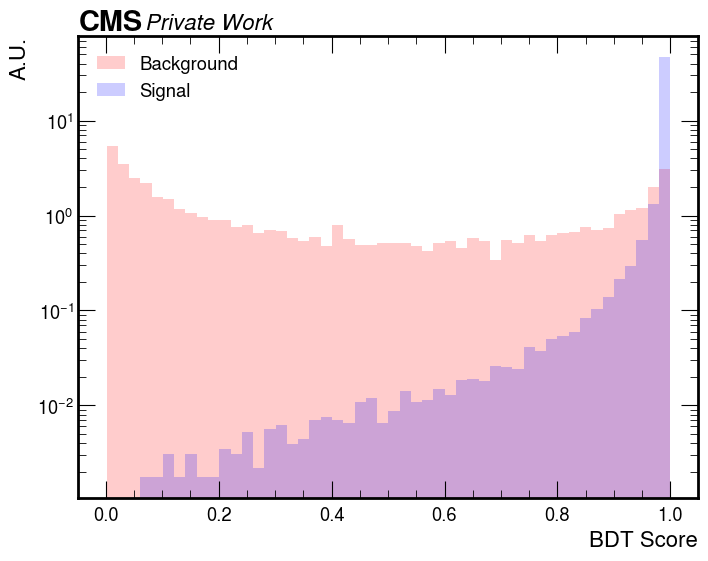

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

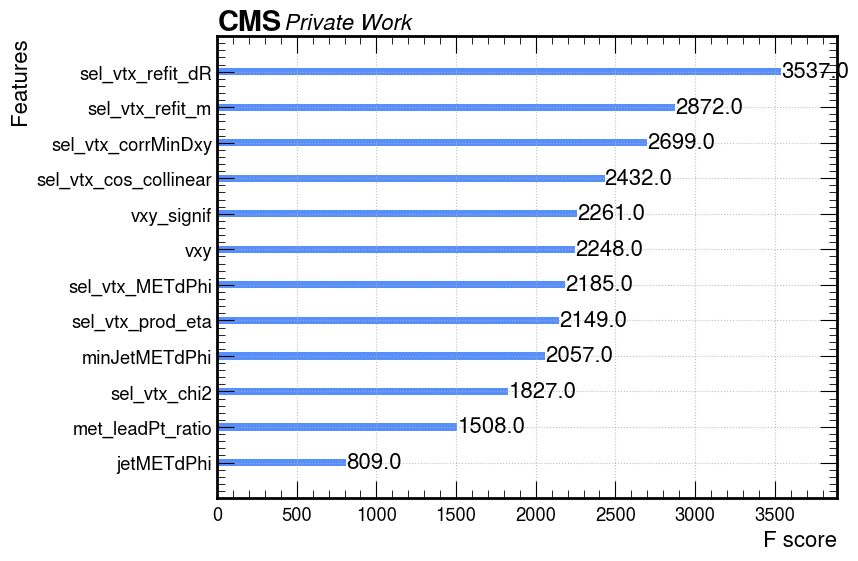

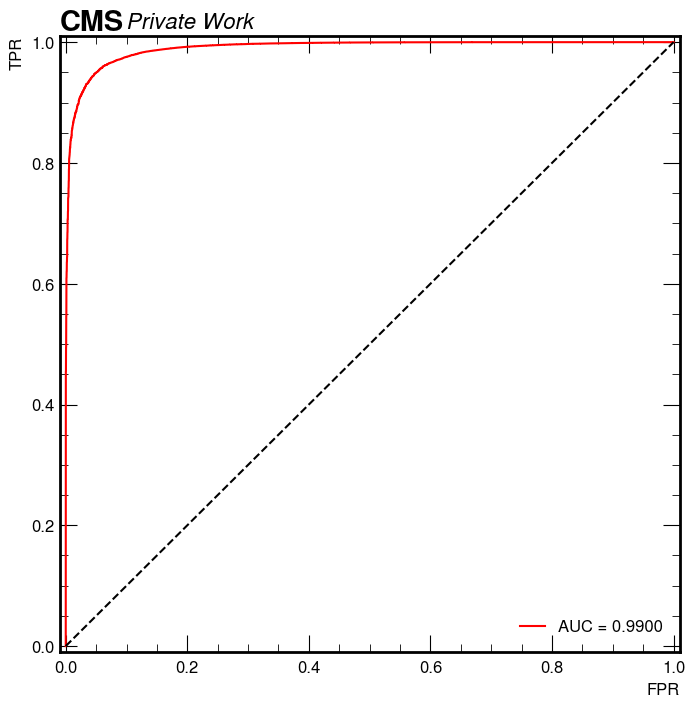

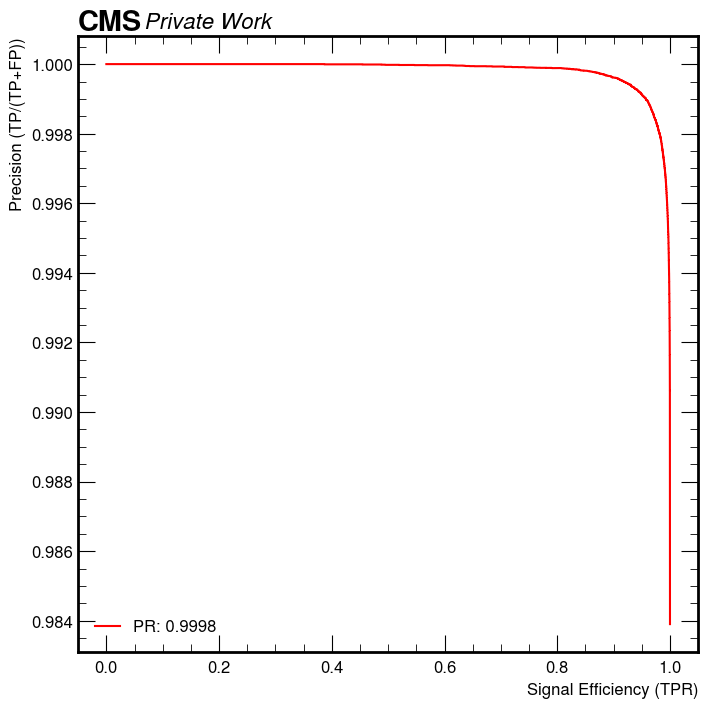

In [3]:
bst, tpr_WP, thres_WP = bdt.train_bdt(bdt_name,sig_file,bkg_file,variables)

In [5]:
print(tpr_WP)
print(thres_WP)

{'tight': 0.7, 'medium': 0.85, 'loose': 0.9}
{'tight': 0.9994943, 'medium': 0.99789095, 'loose': 0.9953783}


# BDT version 2

Here we are using events with 0 < nJets < 3, no b-tagged + the standard skimming preselection. We also use:
- The v8 good_vtx def, which does not include any mass cuts
- ISR cuts
- |PFMET - CaloMET|/CaloMET < 0.7

In [2]:
sig_file = "skimmed_signal_2018_v11_miniAOD_aEM_rdfSkim_MET200_nJetsG0_TrueVertexForSignal_NJetL3_ISRonly"
bkg_file = "skimmed_bkg_2018_v9_miniAOD_rdfSkim_MET200_nJetsG0_TrueVertexForSignal_NJetL3_ISRonly"
variables = ['sel_vtx_chi2','sel_vtx_METdPhi','sel_vtx_refit_m','sel_vtx_refit_dR','sel_vtx_corrMinDxy','vxy','vxy_signif',\
             'sel_vtx_cos_collinear', 'sel_vtx_prod_eta', 'met_leadPt_ratio', 'jetMETdPhi', 'minJetMETdPhi']
bdt_name = "BDT_NJetL3_ISRonly_v2"

Signal events 188831 -> 188831 after gen matching (raw counts)

m1_60.0_delta_0.2_ctau_1 has zero counts
m1_80.0_delta_0.2_ctau_1 has zero counts
m1_60.0_delta_0.2_ctau_10 has zero counts
m1_60.0_delta_0.2_ctau_100 has zero counts
Number of signal subprocesses (training set) with non-zero count: 62
Raw bkg counts: 9351
Number of total background events (raw counts): 9351
Total background counts (xsec weighted): 2251.98
Total background counts (raw): 9351
Sum bkg sf  9351.0
Signal sample size (all subprocesses summed): 377662
Background sample size (all subprocesses summed): 9351
0.024760235342713856 more background than signal samples
There are 62 subprocesses in signal, i.e. per m1/delta/ctau points.

Ideally, sig and bkg sample size for BDT input should be the same.

For background, we care about each background process contribution to the total, i.e. QCD having higher xsec than Diboson.
This should be taken into account, so we got the SF for background input that will correct for th

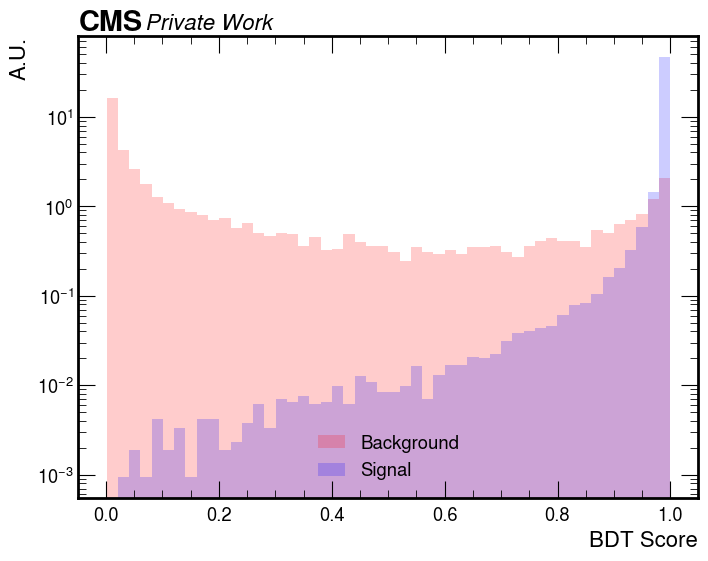

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

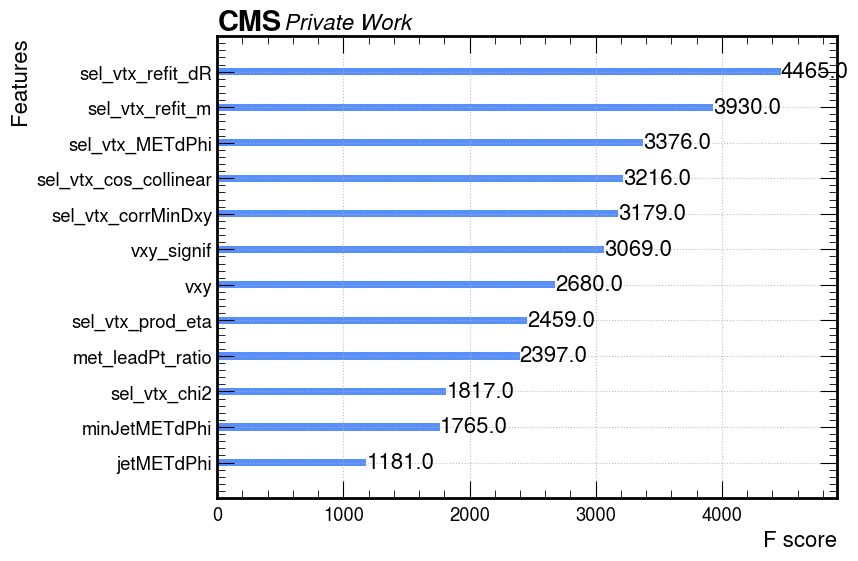

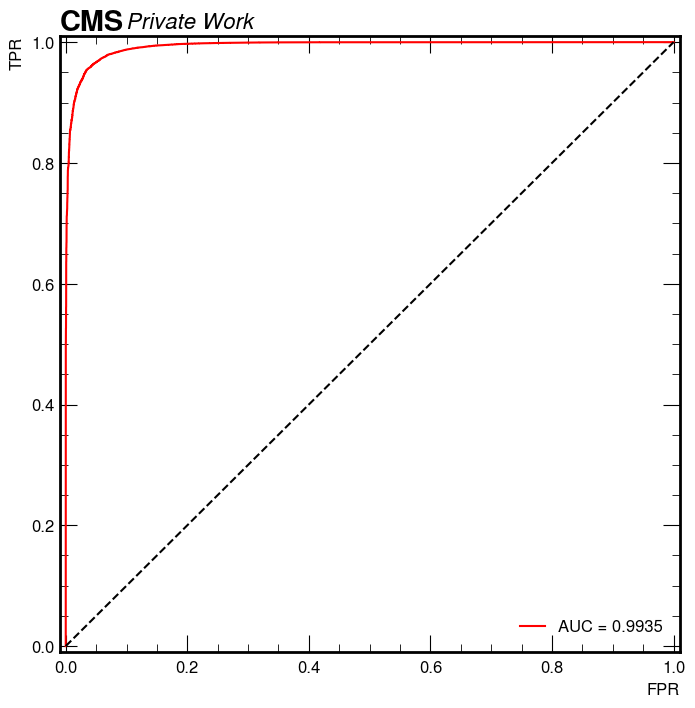

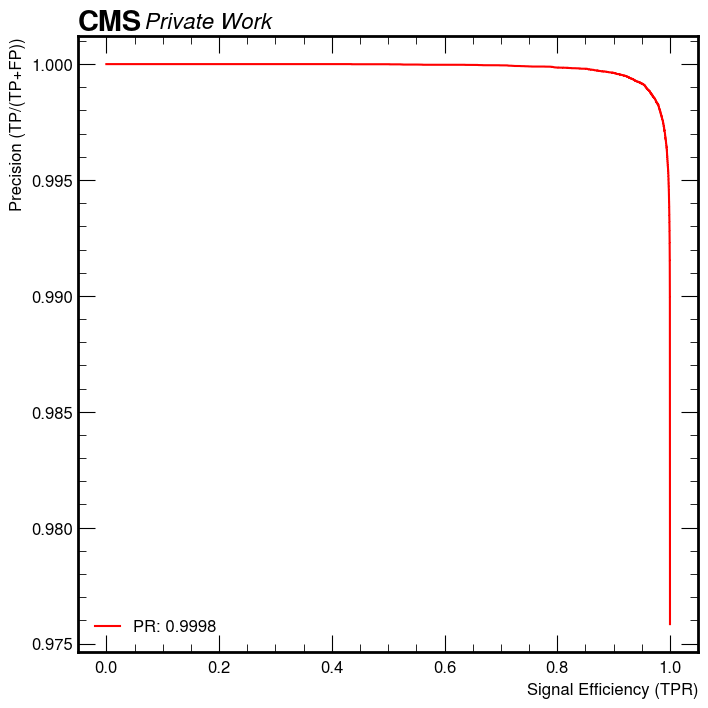

In [3]:
bst, tpr_WP, thres_WP = bdt.train_bdt(bdt_name,sig_file,bkg_file,variables,max_depth=6,n_estimators=500,lr=0.01)

In [4]:
print(tpr_WP)
print(thres_WP)

{'tight': 0.7, 'medium': 0.85, 'loose': 0.9}
{'tight': 0.99885356, 'medium': 0.9968956, 'loose': 0.9943328}
